In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./ACME-HappinessSurvey2020.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [4]:
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [6]:
df['Y'].value_counts()

1    69
0    57
Name: Y, dtype: int64

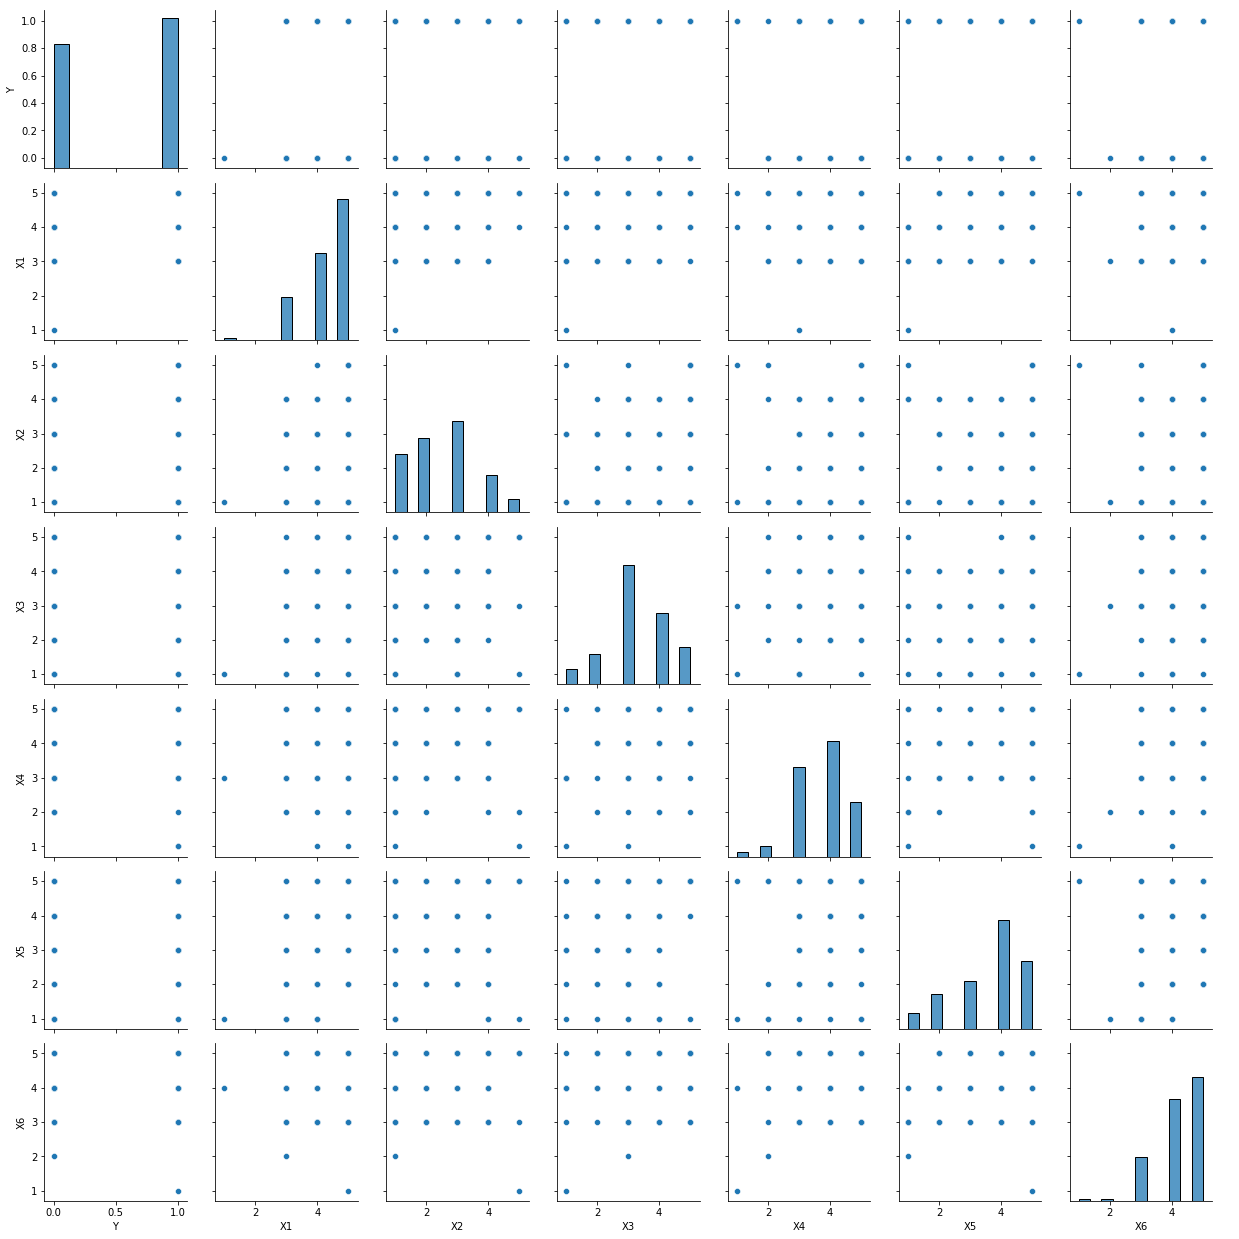

In [7]:
sns.pairplot(df)

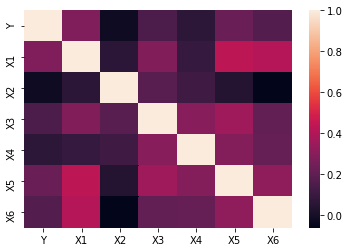

In [8]:
sns.heatmap(df.corr())

In [9]:
train_X, test_X, train_y, test_y = train_test_split(df.drop(['Y'], axis=1), df['Y'], random_state=42)

In [10]:
print("Train dataset shape is: ", train_X.shape, train_y.shape)
print("Train dataset shape is: ", test_X.shape, test_y.shape)

Train dataset shape is:  (94, 6) (94,)
Train dataset shape is:  (32, 6) (32,)


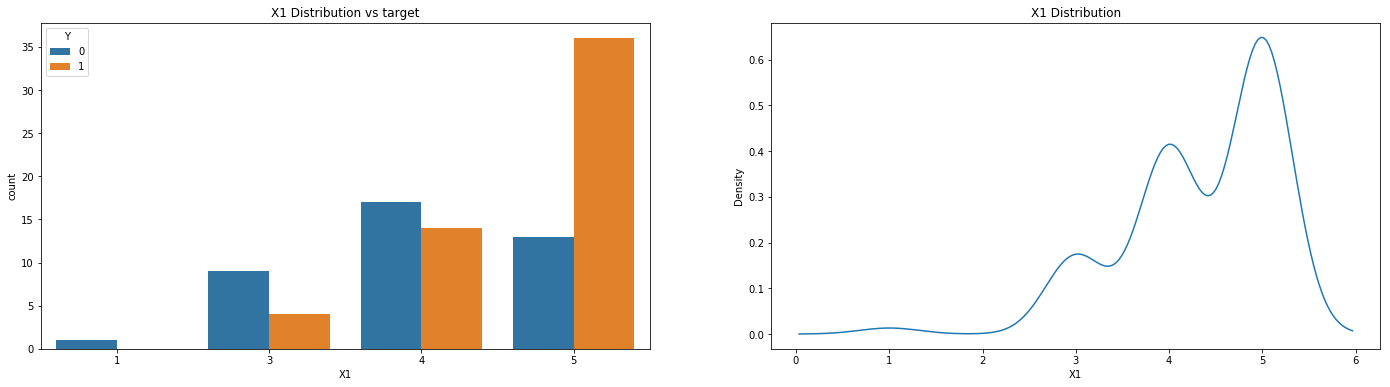

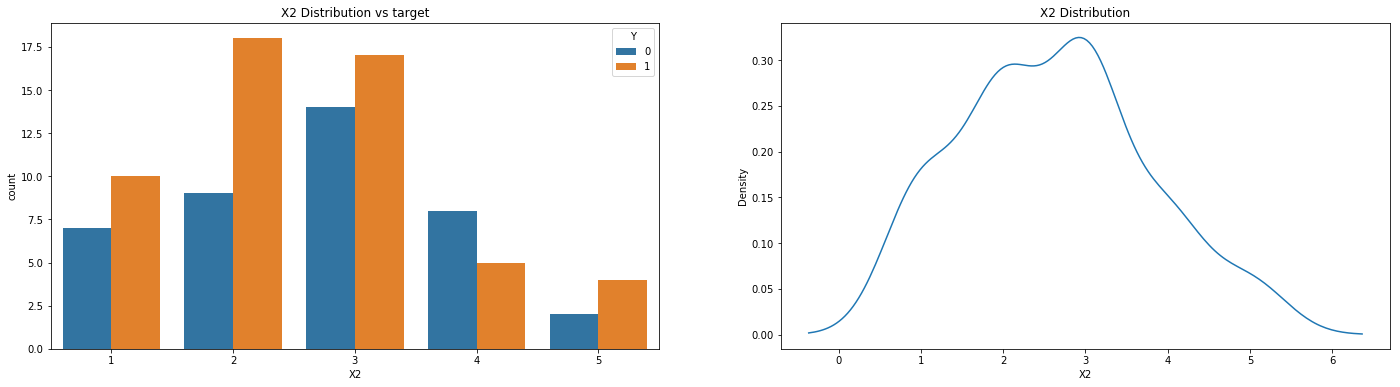

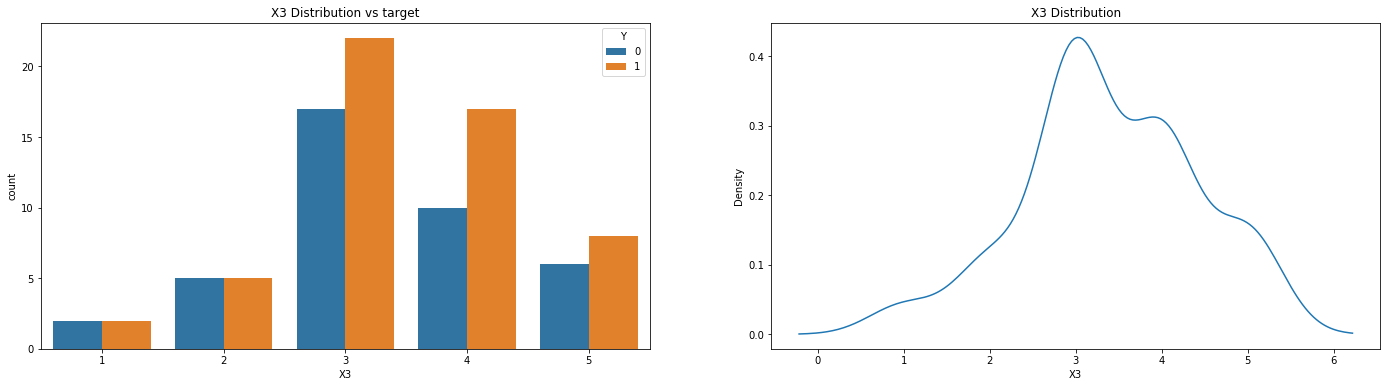

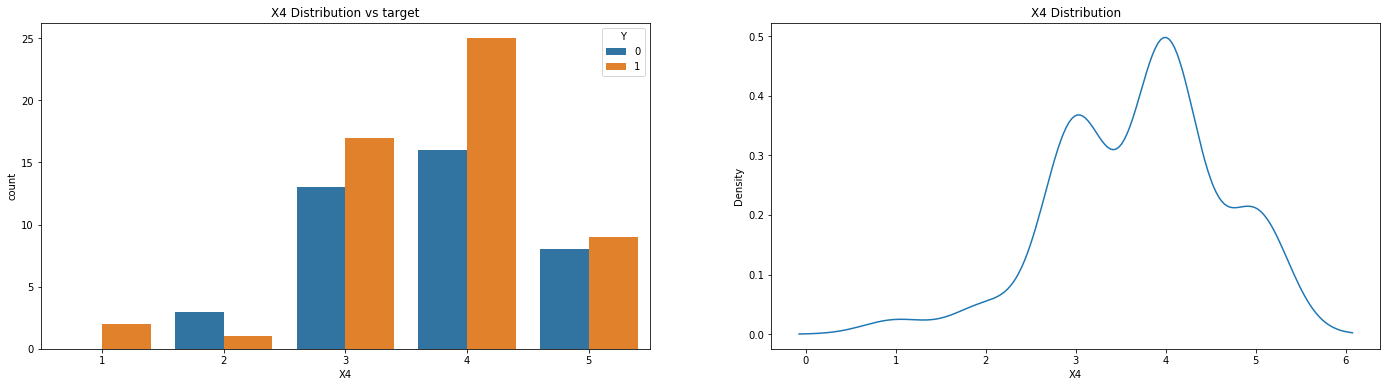

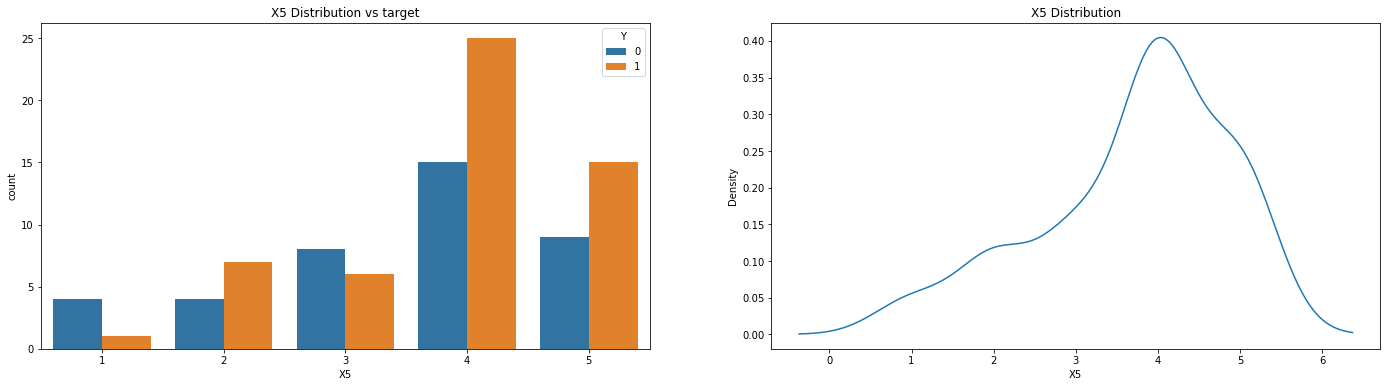

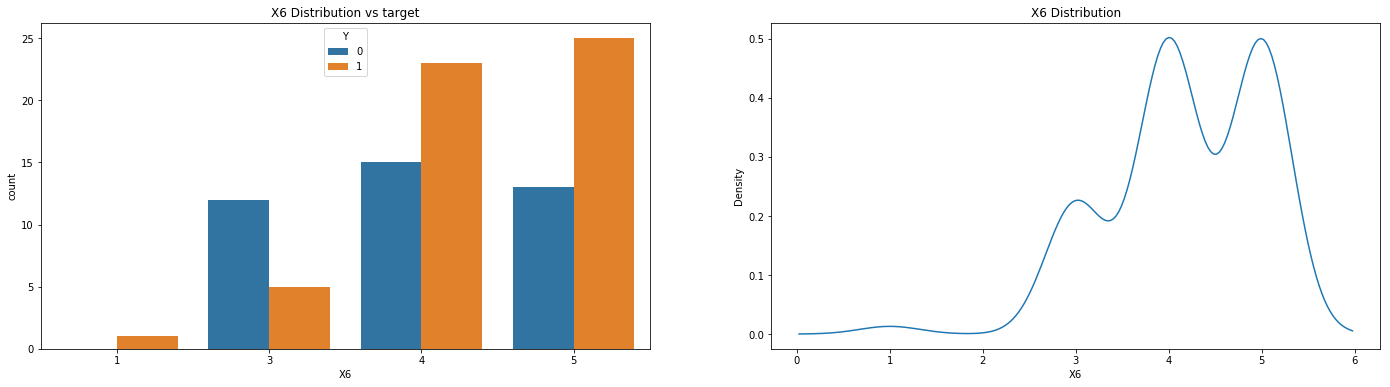

In [11]:
for i,feature in enumerate(train_X.columns):
    fig, axes = plt.subplots(ncols=2, figsize=(24, 6))
    
    sns.countplot(data=train_X, x=feature, hue=train_y, ax=axes[0])
    axes[0].set_title(f"{feature} Distribution vs target")

    sns.kdeplot(data=train_X[feature], ax=axes[1])
    axes[1].set_title(f"{feature} Distribution")

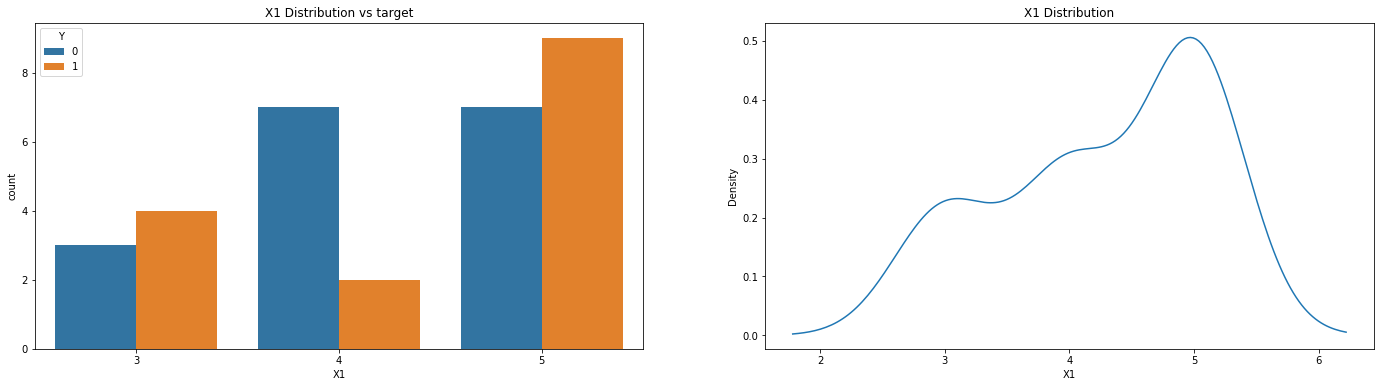

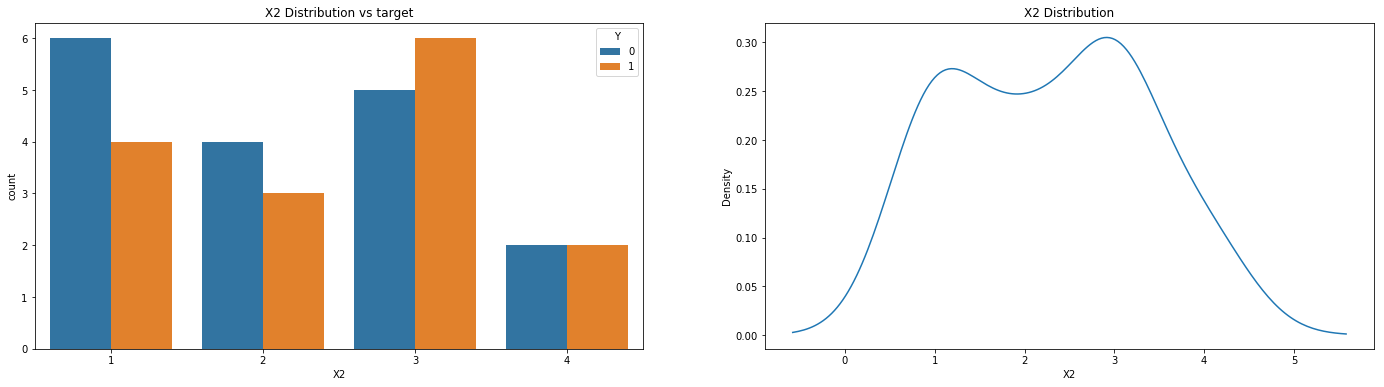

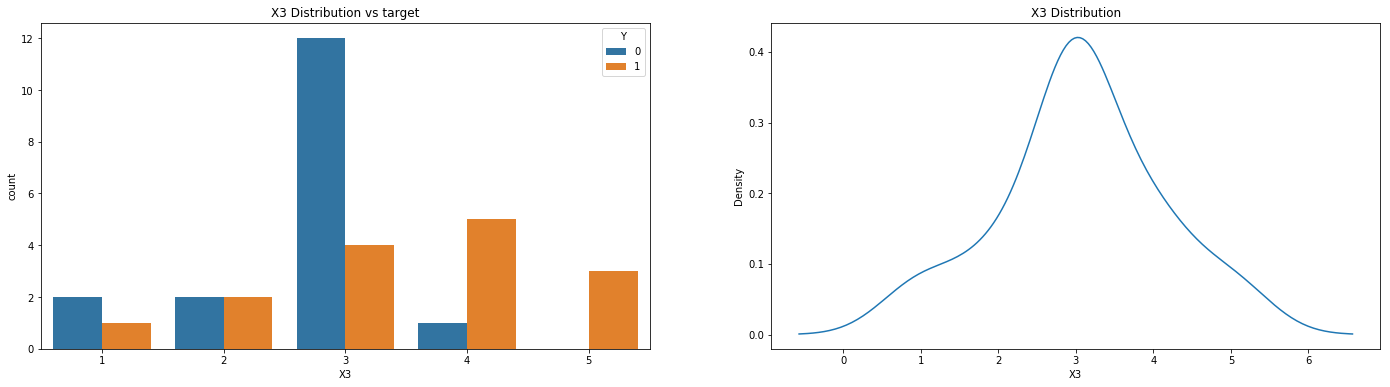

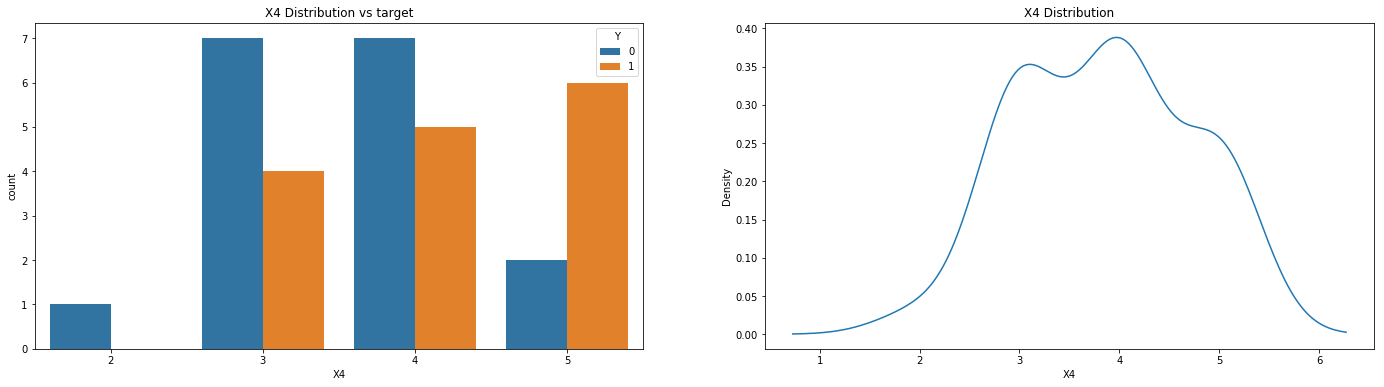

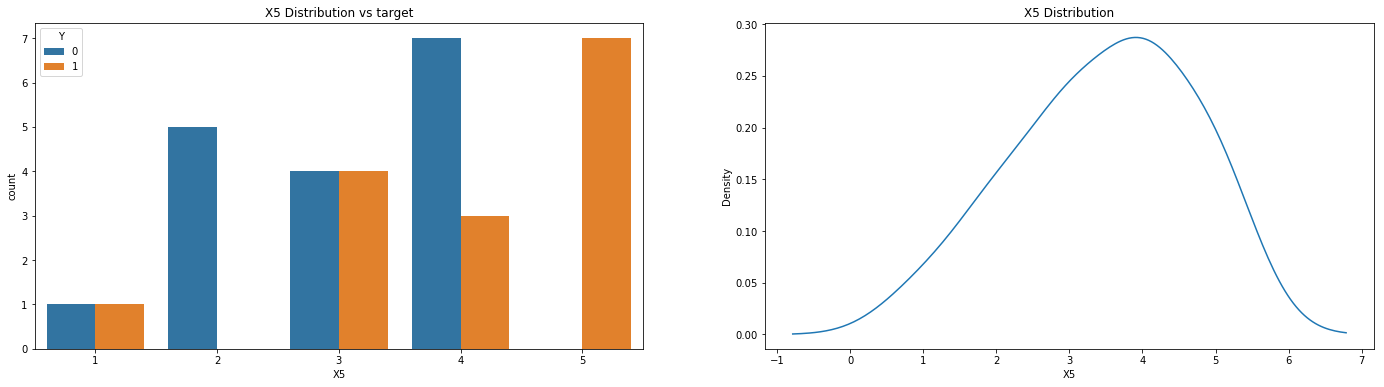

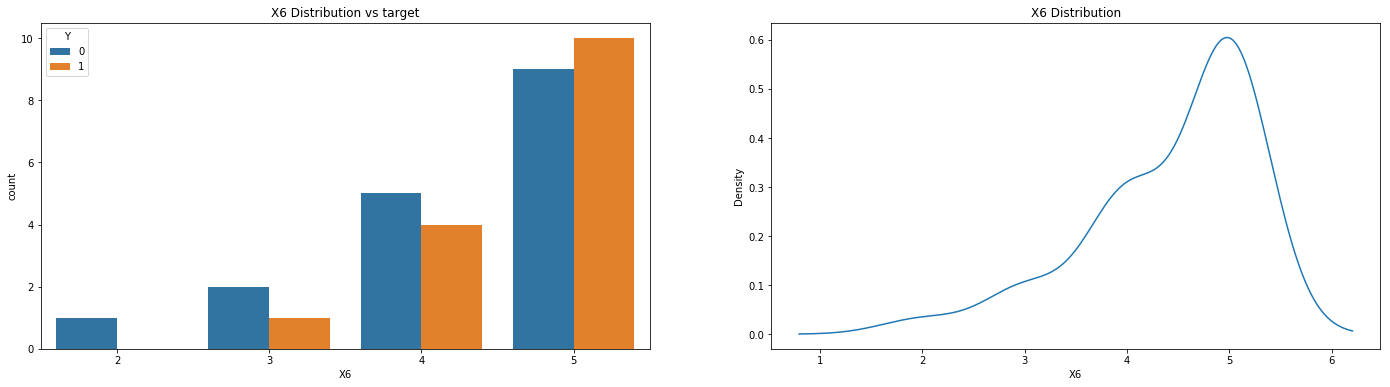

In [12]:
for i,feature in enumerate(test_X.columns):
    fig, axes = plt.subplots(ncols=2, figsize=(24, 6))
    
    sns.countplot(data=test_X, x=feature, hue=test_y, ax=axes[0])
    axes[0].set_title(f"{feature} Distribution vs target")

    sns.kdeplot(data=test_X[feature], ax=axes[1])
    axes[1].set_title(f"{feature} Distribution")

Text(0, 0.5, 'Explained Variance')

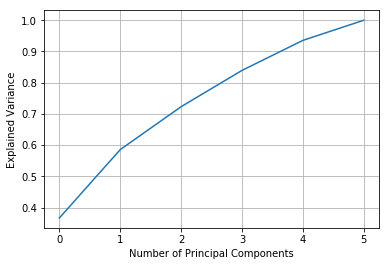

In [13]:
pca = PCA()
comp = pca.fit(train_X)

plt.plot(np.cumsum(comp.explained_variance_ratio_))
plt.grid()
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')

In [14]:
svc_clf =  SVC(kernel='poly')

param_grid_forest = [ 
        {'n_estimators': [30, 50, 70, 100],
         'criterion': ['entropy', 'gini'], 
         'max_depth': range(1,10)
        }
    ]

param_grid_logr=[
        {'C': np.logspace(-3,3,7), 
         'penalty': ['l1','l2']
        }
    ]

param_grid_svc = [
        {'C': [1, 10, 50, 100],
         'degree': range(2,5)
        }
    ]

gs_cv = GridSearchCV(estimator=svc_clf,
            param_grid=param_grid_svc,
            scoring='accuracy',
            cv=5, verbose=2, return_train_score = True)

In [15]:
# Fit using grid search
gs_cv.fit(train_X, train_y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ......................................C=1, degree=2; total time=   0.0s
[CV] END ......................................C=1, degree=2; total time=   0.0s
[CV] END ......................................C=1, degree=2; total time=   0.0s
[CV] END ......................................C=1, degree=2; total time=   0.0s
[CV] END ......................................C=1, degree=2; total time=   0.0s
[CV] END ......................................C=1, degree=3; total time=   0.0s
[CV] END ......................................C=1, degree=3; total time=   0.0s
[CV] END ......................................C=1, degree=3; total time=   0.0s
[CV] END ......................................C=1, degree=3; total time=   0.0s
[CV] END ......................................C=1, degree=3; total time=   0.0s
[CV] END ......................................C=1, degree=4; total time=   0.3s
[CV] END ......................................C

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid=[{'C': [1, 10, 50, 100], 'degree': range(2, 5)}],
             return_train_score=True, scoring='accuracy', verbose=2)

In [16]:
# Best accuracy
print('Best accuracy: %.3f' % gs_cv.best_score_)
# Best params
print('\nBest params:\n', gs_cv.best_params_)

pred_y = gs_cv.predict(test_X)

Best accuracy: 0.626

Best params:
 {'C': 10, 'degree': 2}


In [17]:
# Metric calculation function. Different classification metrics are being caluclated here.

def metric_calculation(test_y, pred_y):
    acc = accuracy_score(test_y, pred_y)
    print("The accuracy is {}".format(acc))

    prec = precision_score(test_y, pred_y)
    print("The precision is {}".format(prec))

    rec = recall_score(test_y, pred_y)
    print("The recall is {}".format(rec))

    f1 = f1_score(test_y, pred_y)
    print("The F1-Score is {}".format(f1))
    
    print(classification_report(test_y, pred_y))
    
    LABELS=['0', '1']
    conf_matrix=confusion_matrix(test_y, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
    plt.title("Happy Customer")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

The accuracy is 0.65625
The precision is 0.625
The recall is 0.6666666666666666
The F1-Score is 0.6451612903225806
              precision    recall  f1-score   support

           0       0.69      0.65      0.67        17
           1       0.62      0.67      0.65        15

    accuracy                           0.66        32
   macro avg       0.66      0.66      0.66        32
weighted avg       0.66      0.66      0.66        32



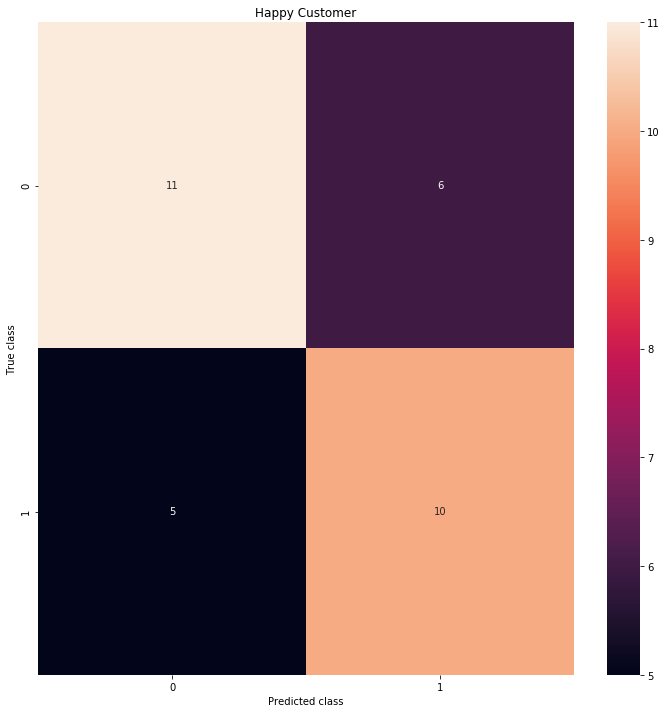

In [18]:
metric_calculation(test_y, pred_y)

In [19]:
from sklearn.feature_selection import RFECV

In [20]:
rfe = RFECV(estimator=RandomForestClassifier(), min_features_to_select=4)

In [21]:
rfe.fit(train_X, train_y)

RFECV(estimator=RandomForestClassifier(), min_features_to_select=4)

In [22]:
rfe.support_

array([ True,  True, False,  True,  True, False])

In [23]:
train_X.columns[rfe.support_]

Index(['X1', 'X2', 'X4', 'X5'], dtype='object')

In [24]:
rfe.ranking_

array([1, 1, 2, 1, 1, 3])

In [25]:
train_X_n = train_X.drop(["X3", "X6"], axis=1)

In [26]:
gs_cv.best_estimator_.fit(train_X_n, train_y)

SVC(C=10, degree=2, kernel='poly')

In [27]:
test_X_n = test_X.drop(["X3", "X6"], axis=1)

In [28]:
pred_y = gs_cv.best_estimator_.predict(test_X_n)

The accuracy is 0.59375
The precision is 0.5625
The recall is 0.6
The F1-Score is 0.5806451612903225
              precision    recall  f1-score   support

           0       0.62      0.59      0.61        17
           1       0.56      0.60      0.58        15

    accuracy                           0.59        32
   macro avg       0.59      0.59      0.59        32
weighted avg       0.60      0.59      0.59        32



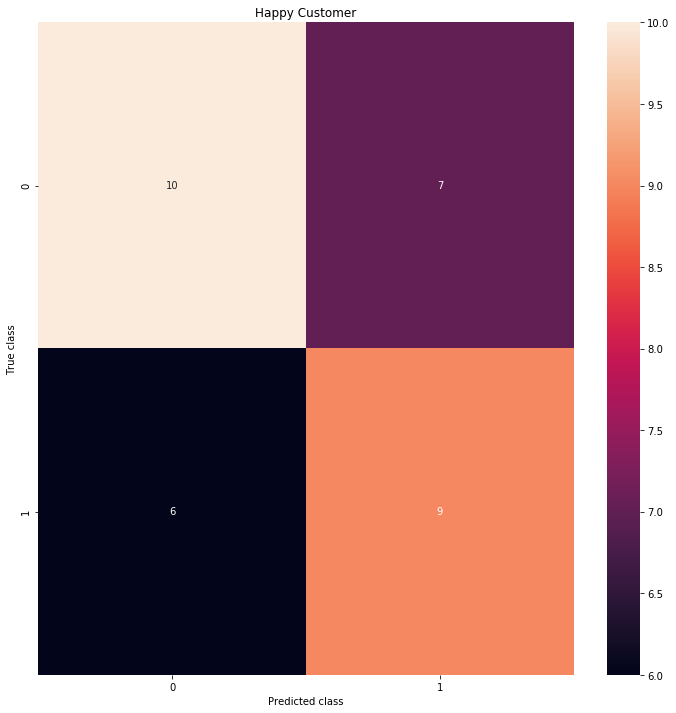

In [29]:
metric_calculation(test_y, pred_y)